<a href="https://colab.research.google.com/github/derekbomfimprates/OUTLIER_DETECTION/blob/main/Outlier_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# OUTLIER DETECTION AND TREATMENT

**File:** outlier_Detection.ipynb

**Data Mining in Python**

**1. Objective:**

The main objective of this project is to identify and handle outliers in a dataset to improve data quality for analysis. Outliers can distort statistical analysis and models, so effective detection and treatment of outliers are crucial for reliable insights.

**2. Tools and Libraries:**

Python (for data mining and analysis)
Pandas (data manipulation)
NumPy (numerical computations)
Matplotlib/Seaborn (for data visualization)

**3. Steps Involved:**

A. Data Cleaning: Before proceeding with outlier detection, several data preprocessing and cleaning steps are applied to ensure that the dataset is in a consistent and usable state. These steps may include:

Handling missing values
Removing duplicates
Standardizing or normalizing the data if necessary

**B. Outlier Detection Methods:**

**Z-Score Method:**

The Z-score is calculated for each data point, representing how many standard deviations away the point is from the mean.
A threshold (commonly 3) is used to detect outliers. Any data point with a Z-score beyond this threshold is classified as an outlier.


**Interquartile Range (IQR):**

The IQR method involves calculating the range between the first (Q1) and third quartiles (Q3) of the data.
Data points outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] are considered outliers.

**C. Outlier Treatment:**

**Winsorizing:**

To treat outliers, the Winsorization technique is applied. Winsorizing limits extreme values in the dataset by capping them to a certain percentile.
This method retains the number of data points but modifies the extreme values, reducing their impact on the analysis.

**4. Results:**

The combination of Z-score and IQR methods provides a robust way of detecting outliers in the dataset.
Winsorization helps in treating the detected outliers, maintaining data integrity while reducing their impact on statistical analysis.

**5. Conclusion:**

By applying outlier detection (Z-Score, IQR) and treatment (Winsorizing) techniques, the dataset becomes cleaner and more suitable for further analysis and modeling. This ensures that the insights drawn from the data are not skewed by extreme values, improving the quality and reliability of the data mining process.

# IMPORT LIBRARIES


In [ ]:
import matplotlib.pyplot as plt                      # For plotting data
import seaborn as sns                                # For plotting data
import pandas as pd                                  # For dataframes
import numpy as np                                   # For IQR method
from scipy import stats                              # For statistic analisys
from scipy.stats import mstats                       # For statistic analises
from sklearn.model_selection import train_test_split # For train/test splits
from sklearn.decomposition import PCA                # For PCA
from sklearn.preprocessing import LabelEncoder       # For data processing encode
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # For LDA
from sklearn.tree import DecisionTreeClassifier, plot_tree   # For decision trees

# LOADING AND PREPARING THE DATA

In [ ]:
df = pd.read_csv("/content/marketing_data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# rename atributtes to remove blank space: " Income" to "Income"

df.columns = df.columns.str.strip()
#df = df.rename(columns = lambda x: x.strip())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [ ]:
df = df.dropna(subset=['Income'])

In [ ]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [ ]:
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])

df['Education'].value_counts()

2    1116
4     481
3     365
0     200
1      54
Name: Education, dtype: int64

In [ ]:
le = LabelEncoder()
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])

df['Marital_Status'].value_counts()

3    857
5    573
4    471
2    232
6     76
1      3
7      2
0      2
Name: Marital_Status, dtype: int64

In [ ]:
le = LabelEncoder()
df['Dt_Customer'] = le.fit_transform(df['Dt_Customer'])

df['Dt_Customer'].value_counts()

32     12
189    11
618    11
44     11
368    10
       ..
501     1
37      1
444     1
337     1
33      1
Name: Dt_Customer, Length: 662, dtype: int64

In [ ]:
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

df['Country'].value_counts()

6    1093
5     337
1     266
0     147
3     147
2     116
7     107
4       3
Name: Country, dtype: int64

# Outlier Analysis

**IQR Method**

In [ ]:
def iqr_get_outliers(data):

    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[((data < lower_limit) | (data > upper_limit))]
    return outliers


In [ ]:
outliers = iqr_get_outliers(df['Income'])
outliers['Income']

325     157146.0
497     160803.0
527     666666.0
731     162397.0
853     157733.0
1826    153924.0
1925    156924.0
2204    157243.0
Name: Income, dtype: float64

**Z-Score Method**

In [ ]:
#print(df["Income"].sort_values(ascending = False).head(10))
#Getting the z-scores of Income column
z_score = stats.zscore(df['Income'])

print("Z-score: \n",z_score)


Z-score: 
 0       1.294840
1       0.192461
2       0.596794
3      -0.785669
4      -1.222743
          ...   
2235    0.565364
2236   -0.842012
2237   -0.235910
2238    0.539259
2239    1.693610
Name: Income, Length: 2216, dtype: float64


In [ ]:
#Identify outlier with a z-score of greater than 3 or less than -3
outliers = df[(z_score>3) | (z_score <-3)]

print("Outliers: \n",outliers['Income'])



Outliers: 
 325     157146.0
497     160803.0
527     666666.0
731     162397.0
853     157733.0
1826    153924.0
1925    156924.0
2204    157243.0
Name: Income, dtype: float64


# PLOT SECTION

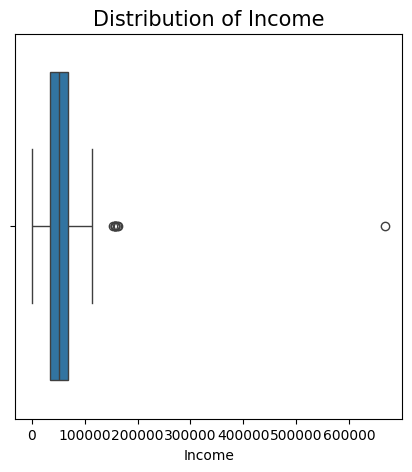

In [ ]:
#Ploting
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=df['Income'],ax=ax)
ax.set_title('Distribution of Income', fontsize=15)

plt.show()



In [ ]:
print(df['Income'].describe())
#The median income of the dataset was found to be 51075, which is close to the mean income value. This indicates that the income distribution is nearly symmetrical, but the presence of outliers is causing the mean value to be higher than the median value.
#print(df['Income'].describe(percentiles=[.10, .20, .30, .40, .50, .60, .70, .80, .90]))

# Filtering the DataFrame to only include outlier with a income over 150000
outlier_income = df[df['Income'] > 150000]
# Calculating the percentage of outlier_income
percentage_outlier_income = (len(outlier_income) / len(df)) * 100
print(percentage_outlier_income)

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64
0.36101083032490977


# TREATING OUTLIERS

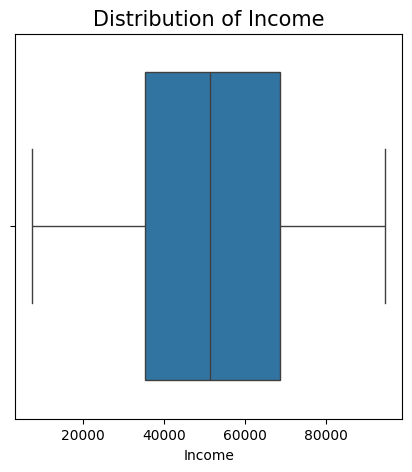

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count     2216.000000
mean     51769.592058
std      20730.741791
min       7500.000000
25%      35303.000000
50%      51381.500000
75%      68522.000000
max      94472.000000
Name: Income, dtype: float64

In [ ]:
# Winsorizing the data involves replacing the income outliers with the nearest non-outlier values. This ensures that the extreme values are still accounted for in the analysis, but their impact is minimized.
#Winsorizing Income Data to minimize the Income outliers
#The winsorize function with limits [0.01, 0.01] was applied to the income column of a dataset, clipping the extreme 1% of values at both ends of the distribution.
#It can reduce the impact of extreme values on statistical analysis by bringing the extreme values inwards towards the center of the distribution.
#However, this can also affect other statistics such as the mean and standard deviation.
#The choice of the "limits" parameter will depend on the specific dataset and goals of the analysis, with a larger value leading to a larger impact on the data and a smaller value leading to a smaller impact.
#The median is not affected by winsorizing, as it is only affected by the values in the middle of the distribution.
# Winsorize income data
df['Income'] = mstats.winsorize(df['Income'], limits=[0.01, 0.01])

df["Income"].sort_values(ascending = False).head(10)

fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x=df['Income'], ax=ax)
ax.set_title('Distribution of Income', fontsize=15)

# Show plot
plt.show()

df["Income"].describe()